In [3]:
import tensorflow as tf
import numpy as np

trX = np.linspace(-1,1,101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33

X = tf.placeholder("float")
Y = tf.placeholder("float")

def model(X, w):
    return tf.mul(X,w)

w = tf.Variable(0.0, name="weights")
y_model = model(X,w)

cost = tf.square(Y - y_model)

train_op = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

with tf.Session() as sess:
    
    tf.initialize_all_variables().run()
    
    for i in range(100):
        for (x,y) in zip(trX, trY):
            sess.run(train_op, feed_dict={X:x, Y:y})
    
    print(sess.run(w))

2.03203


In [44]:
from __future__ import print_function

import tensorflow as tf

In [66]:
a = tf.constant(2)
b = tf.constant(3)

with tf.Session() as sess:
    print("a=2, b=3")
    print("Addition with constant: %i" % sess.run(a+b))
    print("Multiplication with constants: %i" % sess.run(a*b))

a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

add = tf.add(a,b)
mul = tf.mul(a,b)

with tf.Session() as sess:
    print("Adding gives us: %i" % sess.run(add, feed_dict={a: 2, b: 3}))
    print("Multiplying gives us: %i" % sess.run(mul, feed_dict={a: 2, b: 3}))

matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])

product = tf.matmul(matrix1, matrix2)

with tf.Session() as sess:
    result = sess.run(product)
    print(result)

a=2, b=3
Addition with constant: 5
Multiplication with constants: 6
Adding gives us: 5
Multiplying gives us: 6
[[ 12.]]


In [68]:
from __future__ import print_function
import tensorflow as tf

HelloWorld = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(HelloWorld))

b'Hello, TensorFlow!'


Epoch: 0100 cost= 0.130675867 W= 0.379221 b= -0.131066
Epoch: 0200 cost= 0.118979357 W= 0.364261 b= -0.0234403
Epoch: 0300 cost= 0.109829180 W= 0.351027 b= 0.071764
Epoch: 0400 cost= 0.102671221 W= 0.33932 b= 0.15598
Epoch: 0500 cost= 0.097071946 W= 0.328964 b= 0.230477
Epoch: 0600 cost= 0.092692085 W= 0.319804 b= 0.296377
Epoch: 0700 cost= 0.089266315 W= 0.311701 b= 0.35467
Epoch: 0800 cost= 0.086586818 W= 0.304533 b= 0.406236
Epoch: 0900 cost= 0.084491313 W= 0.298192 b= 0.45185
Epoch: 1000 cost= 0.082852505 W= 0.292583 b= 0.4922
Optimization Finished!
Training cost= 0.0828525 W= 0.292583 b= 0.4922 



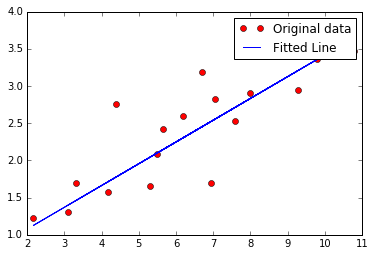

Testing... (Mean square loss Comparison)
Testing cost 0.0771104
Absolute mean square loss difference: 0.00574215


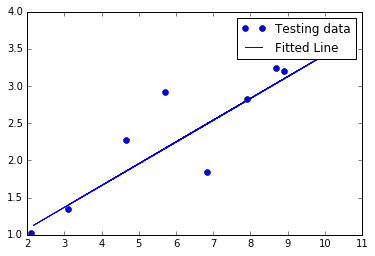

In [84]:
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate   = 0.01
training_epochs = 1000
display_step    = 100

train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

n_samples = train_X.shape[0]

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.randn(), name = "weight")
b = tf.Variable(rng.randn(), name = "bias")

pred = tf.add(tf.mul(X,W), b)

cost      = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        for (x,y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
            
        
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                 "W=", sess.run(W), "b=", sess.run(b))
    
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    
    plt.plot(train_X, train_Y, 'ro', label="Original data")
    plt.plot(train_X, sess.run(W)*train_X + sess.run(b), label="Fitted Line")
    plt.legend()
    plt.show()
    
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])
    
    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})
    print("Testing cost", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))
    
    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label="Fitted Line")
    plt.legend()
    plt.show()